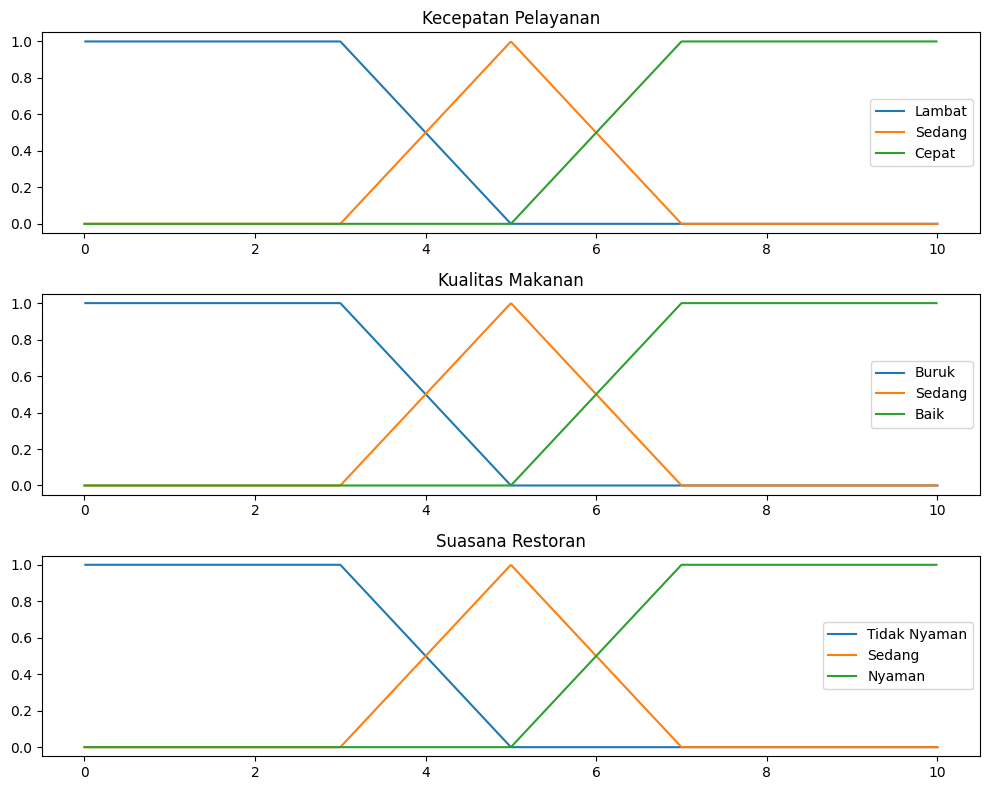

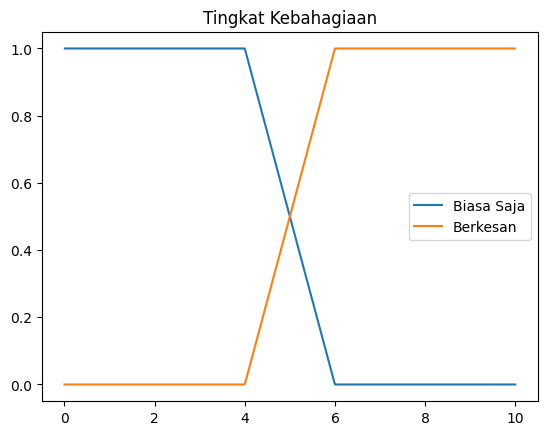

Tingkat Kebahagiaan: 2.53


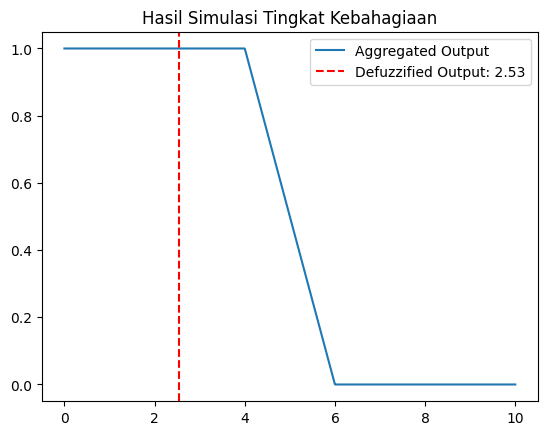

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define membership functions

def trapezoidal(x, a, b, c, d):
    return np.maximum(0, np.minimum((x-a)/(b-a), np.minimum(1, (d-x)/(d-c))))

def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x-a)/(b-a), (c-x)/(c-b)))

# Universe of discourse
x = np.linspace(0, 10, 1000)

# Membership functions for inputs
kecepatan_lambat = trapezoidal(x, 0, 0, 3, 5)
kecepatan_sedang = triangular(x, 3, 5, 7)
kecepatan_cepat = trapezoidal(x, 5, 7, 10, 10)

kualitas_buruk = trapezoidal(x, 0, 0, 3, 5)
kualitas_sedang = triangular(x, 3, 5, 7)
kualitas_baik = trapezoidal(x, 5, 7, 10, 10)

suasana_tidak_nyaman = trapezoidal(x, 0, 0, 3, 5)
suasana_sedang = triangular(x, 3, 5, 7)
suasana_nyaman = trapezoidal(x, 5, 7, 10, 10)

# Membership functions for output
kebahagiaan_biasa = trapezoidal(x, 0, 0, 4, 6)
kebahagiaan_berkesan = trapezoidal(x, 4, 6, 10, 10)

# Plot membership functions
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(x, kecepatan_lambat, label='Lambat')
plt.plot(x, kecepatan_sedang, label='Sedang')
plt.plot(x, kecepatan_cepat, label='Cepat')
plt.title('Kecepatan Pelayanan')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x, kualitas_buruk, label='Buruk')
plt.plot(x, kualitas_sedang, label='Sedang')
plt.plot(x, kualitas_baik, label='Baik')
plt.title('Kualitas Makanan')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(x, suasana_tidak_nyaman, label='Tidak Nyaman')
plt.plot(x, suasana_sedang, label='Sedang')
plt.plot(x, suasana_nyaman, label='Nyaman')
plt.title('Suasana Restoran')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure()
plt.plot(x, kebahagiaan_biasa, label='Biasa Saja')
plt.plot(x, kebahagiaan_berkesan, label='Berkesan')
plt.title('Tingkat Kebahagiaan')
plt.legend()
plt.show()

# RULES
def infer(kecepatan, kualitas, suasana):
    # Fuzzy rules
    rule1 = np.fmin(np.fmax(kecepatan_lambat[kecepatan], np.fmax(kualitas_buruk[kualitas], suasana_tidak_nyaman[suasana])), kebahagiaan_biasa)
    rule2 = np.fmin(np.fmin(kecepatan_cepat[kecepatan], np.fmin(kualitas_baik[kualitas], suasana_nyaman[suasana])), kebahagiaan_berkesan)
    rule3 = np.fmin(np.fmin(kualitas_sedang[kualitas], suasana_sedang[suasana]), kebahagiaan_biasa)
    rule4 = np.fmin(np.fmin(kecepatan_sedang[kecepatan], np.fmin(kualitas_baik[kualitas], suasana_nyaman[suasana])), kebahagiaan_berkesan)

    # Aggregate rules
    aggregated = np.fmax(rule1, np.fmax(rule2, np.fmax(rule3, rule4)))

    return aggregated

# DEFUZZIFIKASI (centroid)
def defuzzify(aggregated):
    return np.sum(aggregated * x) / np.sum(aggregated)

# SIMULASI
kecepatan_input = 7
kualitas_input = 8
suasana_input = 6

aggregated_output = infer(kecepatan_input, kualitas_input, suasana_input)
output_value = defuzzify(aggregated_output)

print(f"Tingkat Kebahagiaan: {output_value:.2f}")

# HASIL
plt.figure()
plt.plot(x, aggregated_output, label='Aggregated Output')
plt.axvline(output_value, color='r', linestyle='--', label=f'Defuzzified Output: {output_value:.2f}')
plt.title('Hasil Simulasi Tingkat Kebahagiaan')
plt.legend()
plt.show()
